In [18]:
pip install gym numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [19]:
import gym
from gym import spaces
import numpy as np

# Custom Environment
class TagEnv(gym.Env):
    def __init__(self):
        super(TagEnv, self).__init__()
        self.grid_size = 5
        self.state = None

        # Action space: Up, Down, Left, Right
        self.action_space = spaces.Discrete(4)

        # Observation space: Positions of two blocks
        self.observation_space = spaces.Box(low=0, high=self.grid_size - 1, shape=(4,), dtype=np.int32)

        self.reset()

    def reset(self):
        # Player 1 (chaser) and Player 2 (runner) positions
        self.state = np.random.randint(0, self.grid_size, size=4)
        return self.state

    def step(self, action):
        chaser_pos = self.state[:2]
        runner_pos = self.state[2:]

        # Move chaser
        chaser_pos = self._move(chaser_pos, action[0])

        # Move runner
        runner_action = np.random.choice(4)  # Runner moves randomly
        runner_pos = self._move(runner_pos, runner_action)

        self.state = np.concatenate([chaser_pos, runner_pos])

        # Check if chaser caught the runner
        done = np.array_equal(chaser_pos, runner_pos)
        reward = 1 if done else -0.1

        return self.state, reward, done, {}

    def _move(self, position, action):
        x, y = position
        if action == 0:  # Up
            y = max(0, y - 1)
        elif action == 1:  # Down
            y = min(self.grid_size - 1, y + 1)
        elif action == 2:  # Left
            x = max(0, x - 1)
        elif action == 3:  # Right
            x = min(self.grid_size - 1, x + 1)
        return np.array([x, y])

    def render(self, mode='human'):
        grid = np.zeros((self.grid_size, self.grid_size), dtype=str)
        grid[:] = '.'
        chaser_pos = tuple(self.state[:2])
        runner_pos = tuple(self.state[2:])
        grid[chaser_pos] = 'C'
        grid[runner_pos] = 'R'
        print("\n".join([" ".join(row) for row in grid]))
        print()

# Q-Learning Code
# Initialize environment
env = TagEnv()

# Parameters
alpha = 0.1    # Learning rate
gamma = 0.9    # Discount factor
epsilon = 0.1  # Exploration rate
episodes = 500

# Initialize Q-table
q_table = np.zeros((env.grid_size, env.grid_size, env.grid_size, env.grid_size, 4))

def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(4)  # Random action
    chaser_x, chaser_y, runner_x, runner_y = state
    return np.argmax(q_table[chaser_x, chaser_y, runner_x, runner_y])  # Best action

# Training loop
for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step([action])

        # Update Q-value
        chaser_x, chaser_y, runner_x, runner_y = state
        next_chaser_x, next_chaser_y, next_runner_x, next_runner_y = next_state
        q_table[chaser_x, chaser_y, runner_x, runner_y, action] += alpha * (
            reward + gamma * np.max(q_table[next_chaser_x, next_chaser_y, next_runner_x, next_runner_y]) 
            - q_table[chaser_x, chaser_y, runner_x, runner_y, action]
        )

        state = next_state
        total_reward += reward

    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

# Testing
state = env.reset()
done = False
env.render()
while not done:
    action = choose_action(state)
    state, _, done, _ = env.step([action])
    env.render()


Episode 1: Total Reward = 0.8
Episode 2: Total Reward = 0.7
Episode 3: Total Reward = -5.799999999999992
Episode 4: Total Reward = 1
Episode 5: Total Reward = -5.8999999999999915
Episode 6: Total Reward = 0.6
Episode 7: Total Reward = 0.7
Episode 8: Total Reward = -0.8000000000000005
Episode 9: Total Reward = 1.1102230246251565e-16
Episode 10: Total Reward = 0.9
Episode 11: Total Reward = -0.9000000000000006
Episode 12: Total Reward = -1.4000000000000008
Episode 13: Total Reward = -4.599999999999996
Episode 14: Total Reward = -1.9000000000000012
Episode 15: Total Reward = -18.200000000000003
Episode 16: Total Reward = -10.199999999999976
Episode 17: Total Reward = 1.1102230246251565e-16
Episode 18: Total Reward = 0.4
Episode 19: Total Reward = -3.9999999999999982
Episode 20: Total Reward = -0.6000000000000003
Episode 21: Total Reward = -2.1000000000000014
Episode 22: Total Reward = 0.8
Episode 23: Total Reward = -3.6999999999999993
Episode 24: Total Reward = -0.6000000000000003
Episode

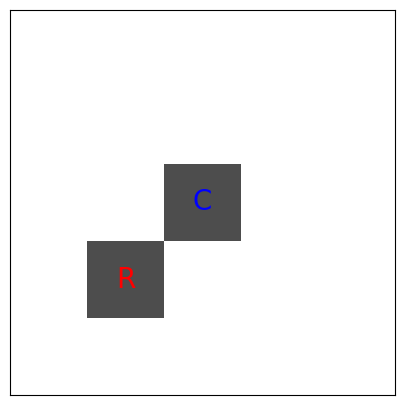

Simulation Complete!


In [20]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Custom Tag Environment
class TagEnv(gym.Env):
    def __init__(self):
        super(TagEnv, self).__init__()
        self.grid_size = 5

        # Action space: Up, Down, Left, Right
        self.action_space = spaces.Discrete(4)

        # Observation space: Positions of two blocks
        self.observation_space = spaces.Box(low=0, high=self.grid_size - 1, shape=(4,), dtype=np.int32)

        self.reset()

    def reset(self):
        # Player 1 (chaser) and Player 2 (runner) positions
        self.state = np.random.randint(0, self.grid_size, size=4)
        return self.state

    def step(self, action):
        chaser_pos = self.state[:2]
        runner_pos = self.state[2:]

        # Move chaser
        chaser_pos = self._move(chaser_pos, action[0])

        # Move runner
        runner_action = np.random.choice(4)  # Runner moves randomly
        runner_pos = self._move(runner_pos, runner_action)

        self.state = np.concatenate([chaser_pos, runner_pos])

        # Check if chaser caught the runner
        done = np.array_equal(chaser_pos, runner_pos)
        reward = 1 if done else -0.1

        return self.state, reward, done, {}

    def _move(self, position, action):
        x, y = position
        if action == 0:  # Up
            y = max(0, y - 1)
        elif action == 1:  # Down
            y = min(self.grid_size - 1, y + 1)
        elif action == 2:  # Left
            x = max(0, x - 1)
        elif action == 3:  # Right
            x = min(self.grid_size - 1, x + 1)
        return np.array([x, y])

    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size), dtype=str)
        grid[:] = '.'
        chaser_pos = tuple(self.state[:2])
        runner_pos = tuple(self.state[2:])
        grid[chaser_pos] = 'C'
        grid[runner_pos] = 'R'

        plt.figure(figsize=(5, 5))
        plt.imshow(grid == ".", cmap="gray", origin="upper", alpha=0.7)
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if grid[i, j] == "C":
                    plt.text(j, i, "C", fontsize=20, ha="center", va="center", color="blue")
                elif grid[i, j] == "R":
                    plt.text(j, i, "R", fontsize=20, ha="center", va="center", color="red")
        plt.xticks([])
        plt.yticks([])
        plt.show()

# Q-Learning Code
# Initialize environment
env = TagEnv()

# Parameters
alpha = 0.1    # Learning rate
gamma = 0.9    # Discount factor
epsilon = 0.3  # Exploration rate
episodes = 500

# Initialize Q-table
q_table = np.zeros((env.grid_size, env.grid_size, env.grid_size, env.grid_size, 4))

def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(4)  # Random action
    chaser_x, chaser_y, runner_x, runner_y = state
    return np.argmax(q_table[chaser_x, chaser_y, runner_x, runner_y])  # Best action

# Training loop
for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step([action])

        # Update Q-value
        chaser_x, chaser_y, runner_x, runner_y = state
        next_chaser_x, next_chaser_y, next_runner_x, next_runner_y = next_state
        q_table[chaser_x, chaser_y, runner_x, runner_y, action] += alpha * (
            reward + gamma * np.max(q_table[next_chaser_x, next_chaser_y, next_runner_x, next_runner_y]) 
            - q_table[chaser_x, chaser_y, runner_x, runner_y, action]
        )

        state = next_state
        total_reward += reward

# Simulation (Testing)
state = env.reset()
done = False

while not done:
    clear_output(wait=True)
    env.render()
    action = choose_action(state)
    state, _, done, _ = env.step([action])
    time.sleep(0.5)

print("Simulation Complete!")
